In [2]:
# 도미 데이터
bream_length = [25.4,26.3,26.5,29.0,29.0,29.7,29.7,30.0,30.0,30.7,31.0,
                31.0,31.5,32.0,32.0,32.0,33.0,33.0,33.5,33.5,
                34.0,34.0,34.5,35.0,35.0,35.0,35.0,36.0,36.0,37.0,
                38.5,38.5,39.5,41.0,41.0]
bream_weight = [242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,
                450.0,500.0,475.0,500.0,500.0,340.0,600.0,600.0,
                700.0,700.0,610.0,650.0,575.0,685.0,620.0,680.0,
                700.0,725.0,720.0,714.0,850.0,1000.0,920.0,955.0,
                925.0,975.0,950.0]
len(bream_weight)


35

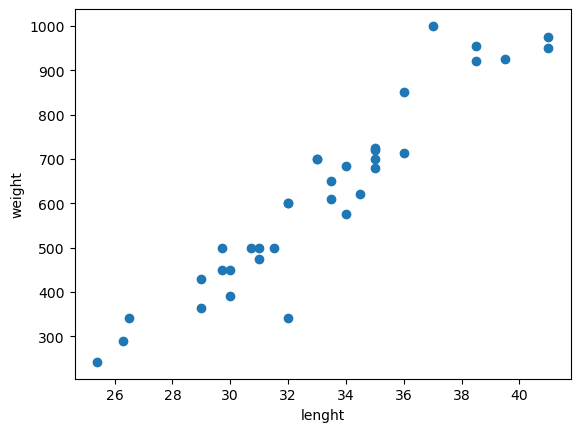

In [3]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [4]:
# 빙어 데이터 
smelt_length = [9.8,10.5,10.6,11.0,11.2,11.3,11.8,11.8,12.0,12.2,
                12.4,13.0,14.3,15.0]
smelt_weight = [6.7,7.5,7.0,9.7,9.8,8.7,10.0,9.9,9.8,12.2,13.4,
                12.2,19.7,19.9]

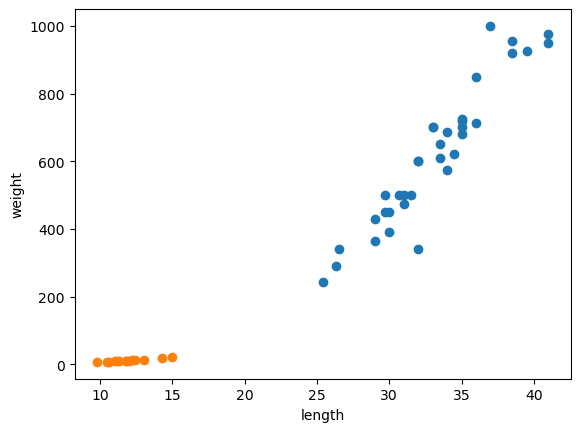

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
# 도미와 빙어 데이터 합치기
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [7]:
# 2차원 배열로 변경
fish_data = [[l,w] for l, w in zip(length,weight)]

In [8]:
# 정답 준비
fish_target = [1]*35 + [0]*14
# 정답을 1,0으로 분류한 것을 이진 분류라고 한다.

In [9]:
#K-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data,fish_target)
# 정확도가 1.0 나온다 

1.0

In [11]:
kn.predict([[30,600]])
# 출력하면 array([1])이 나온다. 
# 1이 도미 0이 빙어이므로 즉 kn.predict([[30,600]])은 도미이다. 

array([1])

In [12]:
# 도미가 나올 확률
kn49 = KNeighborsClassifier(n_neighbors=49)
#n_neighbors를 통해 샘플의 수를 설정할 수 있다.
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
# print(35/49)

0.7142857142857143

In [13]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
KN = kn.fit(train_input,train_target)
kn.score(test_input,test_target)


0.0

In [18]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [19]:
# 데이터 섞기(도미와 빙어 데이터가 적절하게 섞을 수 있도록 해야 함)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

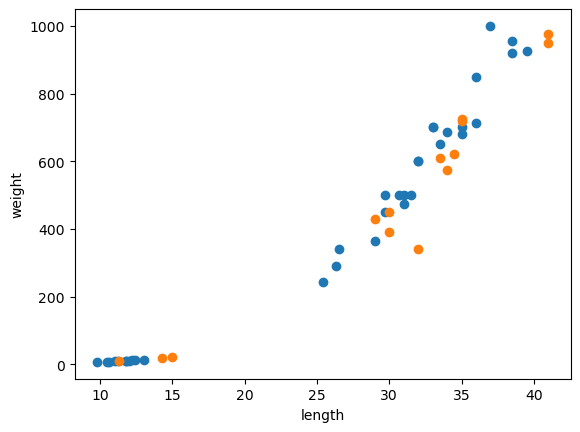

In [20]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
kn = kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0